# Data Description 

I have e-commerce data. What work do they do and how much rupees have they purchased? My dataset has total 13 columns and 11251 rows so 11250 people in the data set.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Data Collection And Cleaning 

In [2]:
p1 = pd.read_csv("D:/Project 1/Sales Data.csv", encoding= 'unicode_escape')

In [3]:
p1.shape

(11251, 15)

In [4]:
p1.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
p1.columns = ('User ID','Name','Product ID','Gender','Age G','Age','Married','State','Zone','Work','Category','Orders','Amount','Not REQ','Not REQ')

In [6]:
#drop unrelated
p1.drop(['Not REQ', 'Not REQ'], axis=1, inplace=True)

In [7]:
p1['Married'] = p1['Married'].replace(0,'Yes')
p1['Married'] = p1['Married'].replace(1,'No')

In [8]:
p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User ID     11251 non-null  int64  
 1   Name        11251 non-null  object 
 2   Product ID  11251 non-null  object 
 3   Gender      11251 non-null  object 
 4   Age G       11251 non-null  object 
 5   Age         11251 non-null  int64  
 6   Married     11251 non-null  object 
 7   State       11251 non-null  object 
 8   Zone        11251 non-null  object 
 9   Work        11251 non-null  object 
 10  Category    11251 non-null  object 
 11  Orders      11251 non-null  int64  
 12  Amount      11251 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 1.1+ MB


In [9]:
#check for null values
p1.isnull().mean()*100

User ID       0.0
Name          0.0
Product ID    0.0
Gender        0.0
Age G         0.0
Age           0.0
Married       0.0
State         0.0
Zone          0.0
Work          0.0
Category      0.0
Orders        0.0
Amount        0.0
dtype: float64

In [10]:
# change data type
p1['Amount'] = p1['Amount'].astype('int')

In [11]:
p1['Amount'].dtypes

dtype('int32')

In [12]:
p1.sample(5)

,User ID,Name,Product ID,Gender,Age G,Age,Married,State,Zone,Work,Category,Orders,Amount
9665,1005780,Meador,P00234642,F,18-25,18,Yes,Karnataka,Southern,Food Processing,Household items,2,3828
3026,1005488,Logan,P00201342,M,26-35,27,Yes,Madhya Pradesh,Central,IT Sector,Footwear & Shoes,4,12232
8250,1004239,Shillingsburg,P00357242,F,51-55,52,Yes,Karnataka,Southern,Automobile,Electronics & Gadgets,1,5886
5644,1005433,Mayank,P00181542,M,36-45,42,Yes,Delhi,Central,Chemical,Electronics & Gadgets,4,8106
3186,1000810,Lonsdale,P00058042,F,26-35,34,Yes,Maharashtra,Western,Media,Food,4,12024


# AIM

In which state , their age, how much rupees they have purchased ?  In which zone they have more purchased people . Whether they are married or not, what work they do and what they buy.

# Describe The Data

In [13]:
p1.describe()

,User ID,Age,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,2.489290,9503.057773
std,1.716125e+03,12.754122,1.115047,5403.926040
min,1.000001e+06,12.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,3.000000,12691.500000
max,1.006040e+06,92.000000,4.000000,54665.000000


In [69]:
# Save to Excel file
p1.to_excel('D:/Project 1/E-Commerce.xlsx', index=False)

# Exploratory Data Analysis (EDA)

# Gender

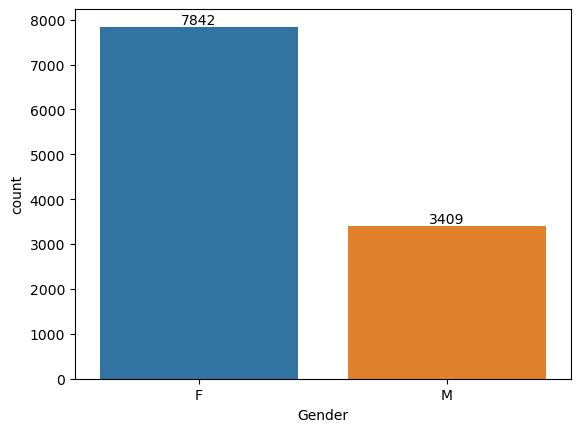

In [27]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = p1)

for bars in ax.containers:
    ax.bar_label(bars)

# Function int Value 

In [33]:

#Amount With Work And You Also check with the zone..

def plot(p1):
    column_name = input("Enter column name (Age, Amount: ")#.strip()
    #, Married, State, Zone, Work
    print()
    print(f"Your Min Values Of {column_name} Is : " , p1[column_name].min())
    print(f"Your Max Values Of {column_name} Is : " , p1[column_name].max())
    print()
    
    if column_name in p1.columns:
        min_value = float(input(f"Enter minimum value for {column_name}: "))
        max_value = float(input(f"Enter maximum value for {column_name}: "))

        # Filter the DataFrame based on the user input
        
        filtered_df = p1[(p1[column_name] >= min_value) & (p1[column_name] <= max_value)]
        
        if not filtered_df.empty:
            print(f"\nShowing information for column: {column_name}\n")
            print(filtered_df[column_name].describe()) 
            print("\nFirst 5 rows of the filtered column:\n", filtered_df[column_name].head())
            
            filtered_df['Zone'].value_counts().plot(kind='pie',autopct='%0.1f')
            plt.title(f"Zone of {column_name} {min_value}-{max_value} in this Range...!")
            
            plt.figure(figsize=(12, 6))
            sns.barplot(x='Amount', y='Work', data=filtered_df, ci=None)
            plt.title(f'Amount spend by Work for {column_name} {min_value}-{max_value}')
            plt.xlabel('Number of Amount(INR)')
            plt.ylabel('Work')
            plt.show()
        else:
            print(f"No data found for {column_name} between {min_value} and {max_value}.")
    else:
        print(f"Column '{column_name}' not found in the DataFrame.")

Enter column name (Age, Amount: Age

Your Min Values Of Age Is :  12
Your Max Values Of Age Is :  92

Enter minimum value for Age: 18
Enter maximum value for Age: 25

Showing information for column: Age

count    1879.000000
mean       21.492815
std         2.247428
min        18.000000
25%        20.000000
50%        21.000000
75%        23.000000
max        25.000000
Name: Age, dtype: float64

First 5 rows of the filtered column:
 6     25
11    20
12    20
15    24
20    19
Name: Age, dtype: int64


C:\Users\Saurav\AppData\Local\Temp\ipykernel_13112\2509386841.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Amount', y='Work', data=filtered_df, ci=None)


AttributeError: 'list' object has no attribute 'bar_label'

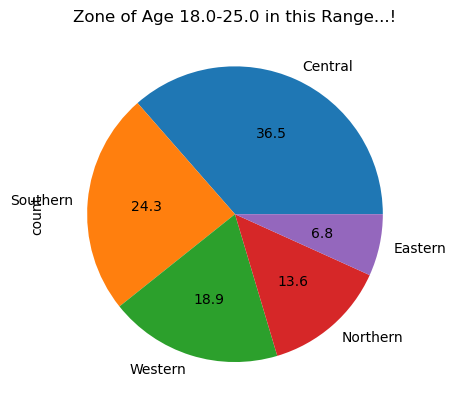

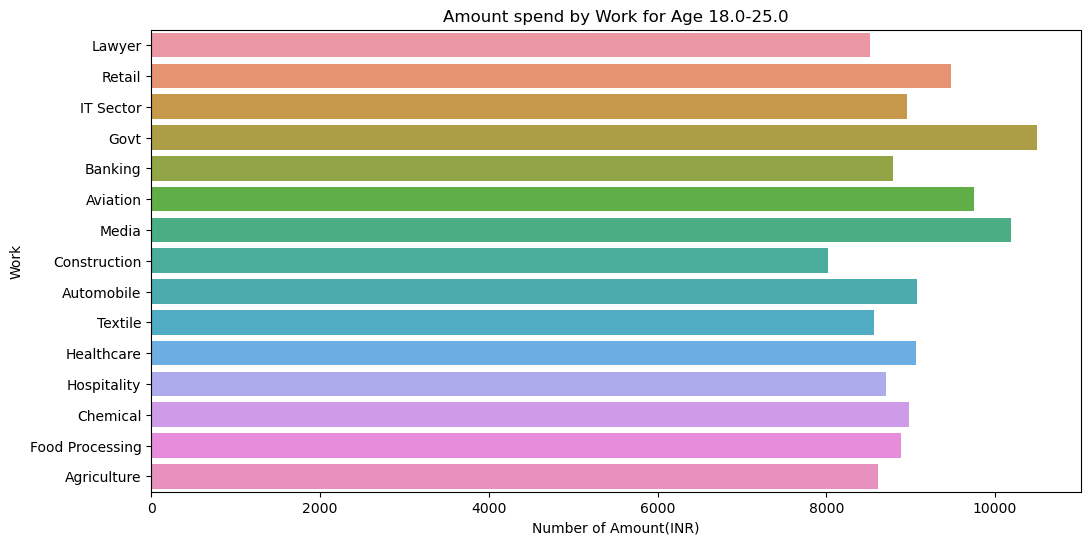

In [31]:
plot(p1)

# State

<Axes: xlabel='State', ylabel='Amount'>

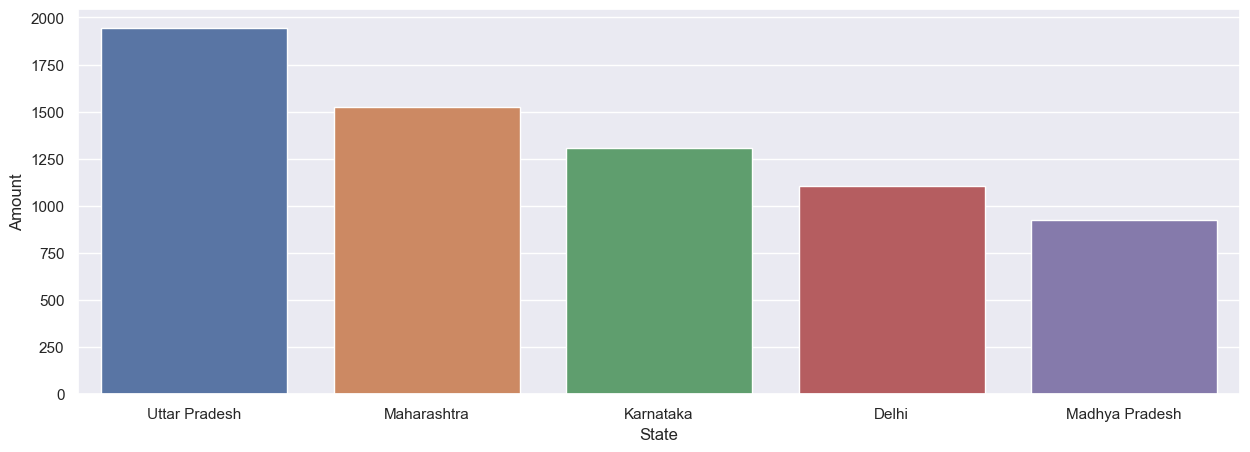

In [34]:
# total amount/sales from top 5 states

sales_state = p1.groupby(['State'], as_index=False)['Amount'].count().sort_values(by='Amount', ascending=False).head(5)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

# Married Status

<Axes: xlabel='Married', ylabel='Amount'>

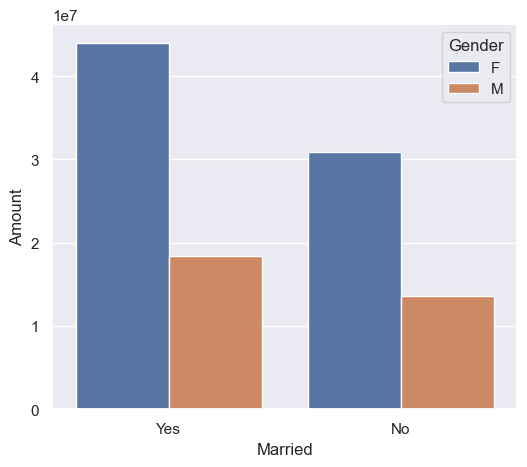

In [35]:
sales_state = p1.groupby(['Married', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Married',y= 'Amount', hue='Gender')

# Work

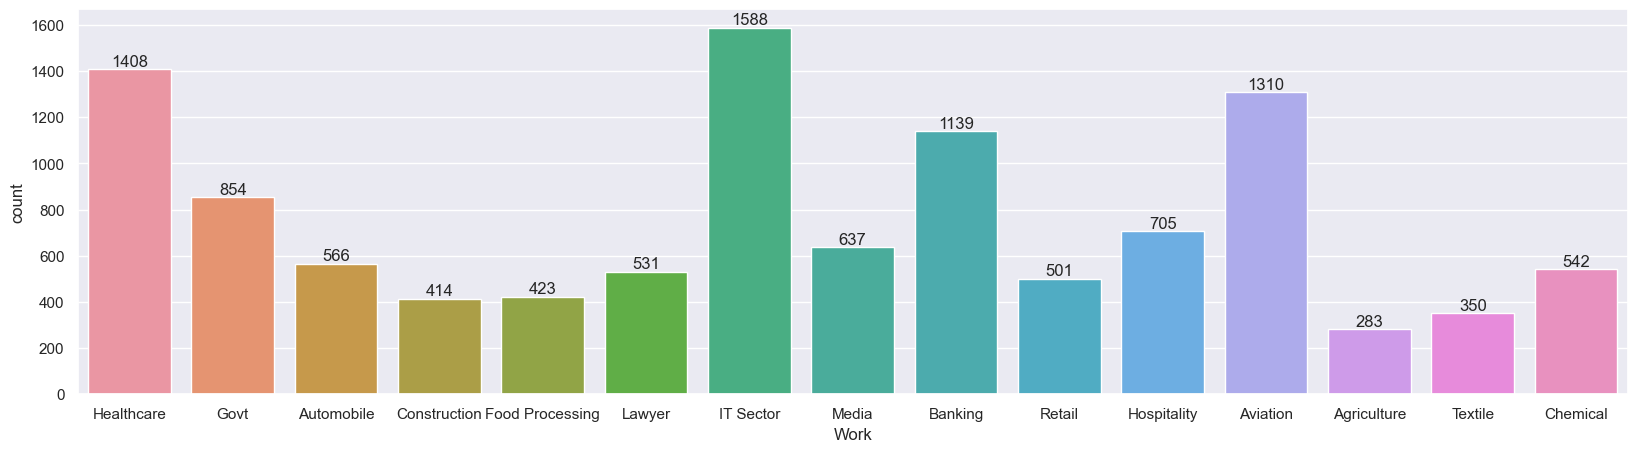

In [36]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = p1, x = 'Work')

for bars in ax.containers:
    ax.bar_label(bars)

# Product Category

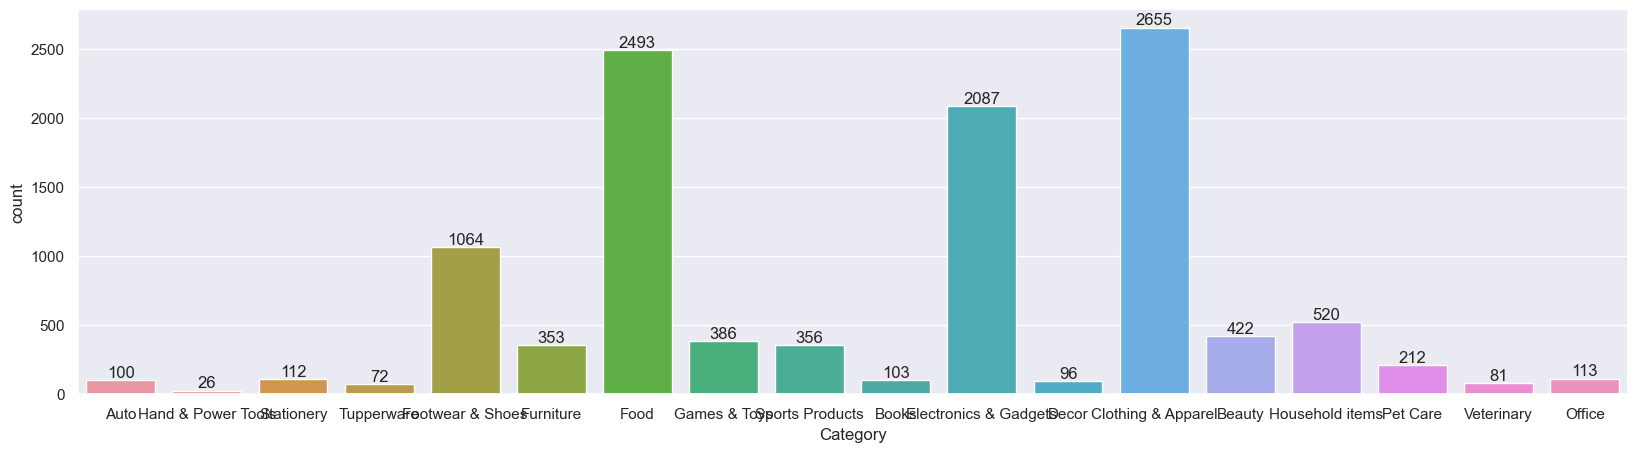

In [37]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = p1, x = 'Category')

for bars in ax.containers:
    ax.bar_label(bars)

# Function  object Value

In [38]:

#Amount With Work And You Also check with the zone..

def plot1(p1):
    column_name = input("Enter column name (Married, State, Zone, Work: ")#.strip()
    print()
    print(f"Enter Your Column Name {column_name} Is : " , p1[column_name].unique())
    print()
    
    if column_name in p1.columns:
        value = input(f"Enter Your Value For {column_name}: ")
        # Filter the DataFrame based on the user input
        
        filtered_df = p1[(p1[column_name] == value)]
        
        if not filtered_df.empty:
            print(f"\nShowing information for column: {column_name}\n")
            print("\nTotal rows of the filtered column:\n", filtered_df[column_name].count())
            
            filtered_df['Zone'].value_counts().plot(kind='pie',autopct='%0.1f')
            plt.title(f"Zone of {column_name} {value}...!")
            
            plt.figure(figsize=(12, 6))
            sns.barplot(x='Amount', y='Work', data=filtered_df, ci=None)
            plt.title(f'Amount sales by Work for {column_name} Status {value}')
            plt.xlabel('Number of Amount(INR)')
            plt.ylabel('Work')
            plt.show()
            
        else:
            print(f"No data found for {column_name} this value {value}.")
    else:
        print(f"Column '{column_name}' not found in the DataFrame.")

Enter column name (Married, State, Zone, Work: State

Enter Your Column Name State Is :  ['Maharashtra' 'Andhra\xa0Pradesh' 'Uttar Pradesh' 'Karnataka' 'Gujarat'
 'Himachal Pradesh' 'Delhi' 'Madhya Pradesh' 'Jharkhand' 'Kerala'
 'Haryana' 'Bihar' 'Rajasthan' 'Uttarakhand' 'Telangana' 'Punjab']

Enter Your Value For State: Maharashtra

Showing information for column: State


Total rows of the filtered column:
 1526


C:\Users\Saurav\AppData\Local\Temp\ipykernel_13112\866691967.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Amount', y='Work', data=filtered_df, ci=None)


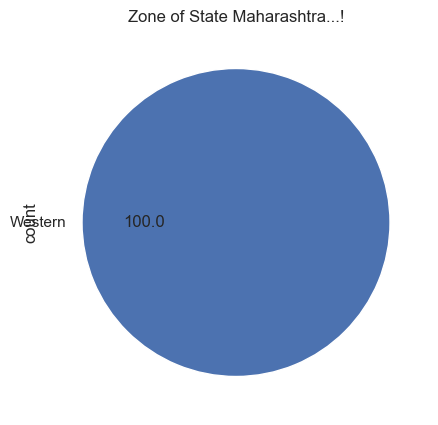

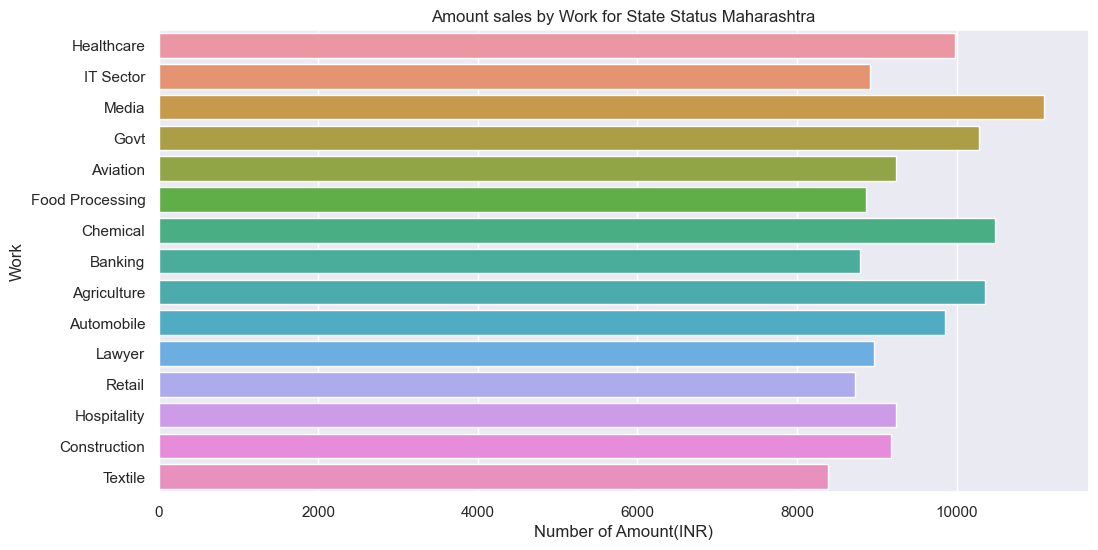

In [39]:
plot1(p1)

# Conclusions 

* See the most of the buyers are of age group between 20-35 yrs .
* I can see that most of the buyers are females and even the purchasing power of females are greater then men And that most of buyers are married(Women).
* Mostly of the sold products are from Food,Clothing and Electronics category.
* Most of the buyers are working in IT,healthcare and Aviation sector.
* The most of the orders & total sales/amount are from Utter Pradesh,Maharashtra and Karnataka respectively.